# PyTorch Autograd Tutorial

This tutorial introduces **Autograd**, PyTorch's automatic differentiation engine, which is essential for training neural networks. Autograd computes gradients of tensors automatically, enabling gradient-based optimization (e.g., backpropagation). We'll cover:

- Creating tensors with gradient tracking.
- Performing operations and building a computation graph.
- Computing gradients.
- A simple optimization example.

## Prerequisites
- Basic Python and PyTorch knowledge.
- Jupyter Notebook environment with PyTorch installed.

Let's get started!

## Step 1: Setting Up PyTorch
First, import PyTorch and verify the version.

In [37]:
import torch
print(torch.__version__)  # Check PyTorch version

2.6.0+cu126


## Step 2: Creating Tensors with Gradient Tracking
To use Autograd, we need tensors with `requires_grad=True`. This tells PyTorch to track operations on the tensor for gradient computation.

In [38]:
# Create a tensor with requires_grad=True
# I have two trainable parameters: w0 and w1
w = torch.tensor([2.0, 3.0], requires_grad=True)
print("Tensor w:", w)

# Create another tensor
b = torch.tensor([1.0, 4.0], requires_grad=True)
print("Tensor b:", b)

Tensor w: tensor([2., 3.], requires_grad=True)
Tensor b: tensor([1., 4.], requires_grad=True)


## Step 3: Computing Gradients
To compute gradients, we call `.backward()` on a scalar output. If the output is a tensor (like `z`), we need to reduce it to a scalar (e.g., using `.sum()`). The gradients are stored in the `.grad` attribute of the input tensors.

       w [2.0, 3.0]
           |
           | **2 (PowBackward0)
           v
       temp [4.0, 9.0]
           |
           | + (AddBackward0)
           |        b [1.0, 4.0]
           |        /
           v       /
        z [5.0, 13.0]
           |
           | sum (SumBackward0)
           v
       loss [18.0]

In [ ]:
# Compute z = w^2 + b (element-wise)
z = w**2 + b
print("Result z:", z)

# z is a tensor with gradients tracked
# Means w, b, z are the components of the computatioal graph
print("z requires_grad:", z.requires_grad)

# Reduce z to a scalar by summing its elements
# both trainable parameters w and b affect the loss
loss = z.sum()
print("Loss (sum of z):", loss)

# Compute gradients
loss.backward()

# Gradients are stored in x.grad and y.grad
print("Gradient of w (∂loss/∂w):", w.grad)
print("Gradient of b (∂loss/∂b):", b.grad)

Result z: tensor([ 5., 13.], grad_fn=<AddBackward0>)
z requires_grad: True
Loss (sum of z): tensor(18., grad_fn=<SumBackward0>)
Gradient of w (∂loss/∂w): tensor([4., 6.])
Gradient of b (∂loss/∂b): tensor([1., 1.])


### Explanation

To reduce the loss, you can modify the four numbers corresponding to the elements of w and b (i.e., w1, w2, b1, b2). Here is why:

- For `z = w^2 + b`, the loss is `loss = z.sum()`.
- The gradient of `loss` with respect to `w` is `∂loss/∂w = 2w` (derivative of `w^2`).
  - For `w = [2.0, 3.0]`, this gives `2w = [4.0, 6.0]`.
- The gradient of `loss` with respect to `b` is `∂loss/∂b = 1` (derivative of `b`).
  - For `w = [1.0, 4.0]`, this gives `[1.0, 1.0]`.

In gradient-based optimization (e.g., gradient descent), you update each element of w and b to reduce the loss:
- Update rule: `w[i] = w[i] - learning_rate * w.grad[i]`.
- Update rule: `b[i] = b[i] - learning_rate * b.grad[i]`.

or simply
- `w = w - learning_rate * w.grad`
- `b = b - learning_rate * b.grad`

## Step 4: A Simple Optimization Example (one parameter)
Autograd is often used to optimize parameters. Let's minimize a simple function `f(w) = w^2` using gradient descent.

In [40]:
# Initialize a parameter
w = torch.tensor([4.0], requires_grad=True)
learning_rate = 0.1
iterations = 5

print("Optimizing w to minimize f(w) = w^2")

for i in range(iterations):
    # Forward pass: compute the function
    loss = w**2
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Update w using gradient descent (no autograd tracking for updates)
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # Zero out gradients to avoid accumulation
    w.grad.zero_()
    
    print(f"Iteration {i+1}: w = {w.item():.4f}, loss = {loss.item():.4f}")

Optimizing w to minimize f(w) = w^2
Iteration 1: w = 3.2000, loss = 16.0000
Iteration 2: w = 2.5600, loss = 10.2400
Iteration 3: w = 2.0480, loss = 6.5536
Iteration 4: w = 1.6384, loss = 4.1943
Iteration 5: w = 1.3107, loss = 2.6844


### Explanation
- We aim to minimize `f(w) = w^2`, which has a minimum at `w = 0`.
- Gradient: `∂f/∂w = 2w`.
- Gradient descent update: `w = w - learning_rate * gradient`.
- We use `torch.no_grad()` to prevent tracking during parameter updates.
- `w.grad.zero_()` clears old gradients to avoid accumulation.

The output shows `w` approaching 0, and the loss (`w^2`) decreasing.

## Step 5: Plot all weight changes - Gradient Descent
Autograd is often used to optimize parameters. Let's minimize a simple function `f(w) = w^2` using gradient descent.

Optimizing w to minimize f(w) = w^2
Iteration 1: w = 3.2000, loss = 16.0000
Iteration 2: w = 2.5600, loss = 10.2400
Iteration 3: w = 2.0480, loss = 6.5536
Iteration 4: w = 1.6384, loss = 4.1943
Iteration 5: w = 1.3107, loss = 2.6844


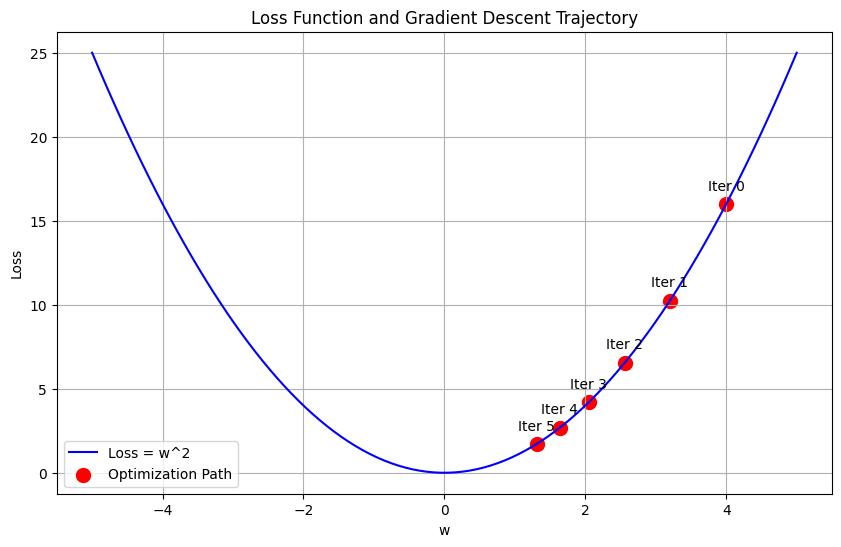

In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameter and optimization settings
w = torch.tensor([4.0], requires_grad=True)
learning_rate = 0.1
iterations = 5

# Lists to store w and loss values for each iteration
w_values = [w.item()]
loss_values = []

# Run gradient descent and collect values
print("Optimizing w to minimize f(w) = w^2")
for i in range(iterations):
    # Forward pass: compute the function
    loss = w**2
    loss_values.append(loss.item())
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Update w using gradient descent (no autograd tracking for updates)
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # Zero out gradients to avoid accumulation
    w.grad.zero_()
    
    w_values.append(w.item())
    print(f"Iteration {i+1}: w = {w.item():.4f}, loss = {loss.item():.4f}")

# Create data for plotting the loss function
w_range = np.linspace(-5, 5, 100)
loss_curve = w_range**2

# Plot the loss function and optimization trajectory
plt.figure(figsize=(10, 6))
plt.plot(w_range, loss_curve, label='Loss = w^2', color='blue')
plt.scatter(w_values, [w**2 for w in w_values], color='red', s=100, label='Optimization Path')
for i, (w_val, loss_val) in enumerate(zip(w_values, [w**2 for w in w_values])):
    plt.annotate(f'Iter {i}', (w_val, loss_val), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('w')
plt.ylabel('Loss')
plt.title('Loss Function and Gradient Descent Trajectory')
plt.grid(True)
plt.legend()
plt.show()

## Step 6: Disabling Gradient Tracking
- When requires_grad=True, the tensor is part of PyTorch’s computation graph, and converting it to a NumPy array would break the graph.
- Sometimes, you need to perform operations without gradient tracking (e.g., during inference). Use `torch.no_grad()` or `.detach()`.

In [42]:

# Example with no_grad
with torch.no_grad():
    result = w**2  # No computation graph is built
print("Result without gradient tracking:", result)

# Detach a tensor
detached_x = w.detach()
print("Detached tensor requires_grad:", detached_x.requires_grad)

# create a new tensor that is a copy of x but detached from the computation graph and independent of gradient tracking
detached_copy_x = w.clone().detach()

# access to the tensor’s underlying data as another tensor, bypassing the autograd (gradient tracking) system.
w = torch.tensor([1.0, 2.0], requires_grad=True)
print(w)
print("access w with out participating in a computatioinal graph", w.data)

Result without gradient tracking: tensor([1.7180])
Detached tensor requires_grad: False
tensor([1., 2.], requires_grad=True)
access w with out participating in a computatioinal graph tensor([1., 2.])


## Step 7:  Simple Optimization Example (two parameters)

In [43]:
import torch

# Initialize tensor w with requires_grad=True
w = torch.tensor([1.0, 2.0], requires_grad=True)
learning_rate = 0.1

# Perform 3 iterations of gradient descent
for iteration in range(3):
    print(f"\nIteration {iteration + 1}:")

    # Forward pass: Compute loss = w^2 (element-wise)
    loss = (w**2).sum()  # loss = w1^2 + w2^2
    print("Loss:", loss.item())

    # Backward pass: Compute gradients
    loss.backward()
    print("w.grad (before zeroing):", w.grad)  # ∂loss/∂w = [2*w1, 2*w2]

    # Gradient descent update
    with torch.no_grad():
        w -= learning_rate * w.grad  # w = w - learning_rate * w.grad
    print("Updated w:", w)

    # Zero gradients
    w.grad.zero_()  # Reset gradients to zero
    print("w.grad (after zeroing):", w.grad)


Iteration 1:
Loss: 5.0
w.grad (before zeroing): tensor([2., 4.])
Updated w: tensor([0.8000, 1.6000], requires_grad=True)
w.grad (after zeroing): tensor([0., 0.])

Iteration 2:
Loss: 3.200000286102295
w.grad (before zeroing): tensor([1.6000, 3.2000])
Updated w: tensor([0.6400, 1.2800], requires_grad=True)
w.grad (after zeroing): tensor([0., 0.])

Iteration 3:
Loss: 2.047999858856201
w.grad (before zeroing): tensor([1.2800, 2.5600])
Updated w: tensor([0.5120, 1.0240], requires_grad=True)
w.grad (after zeroing): tensor([0., 0.])


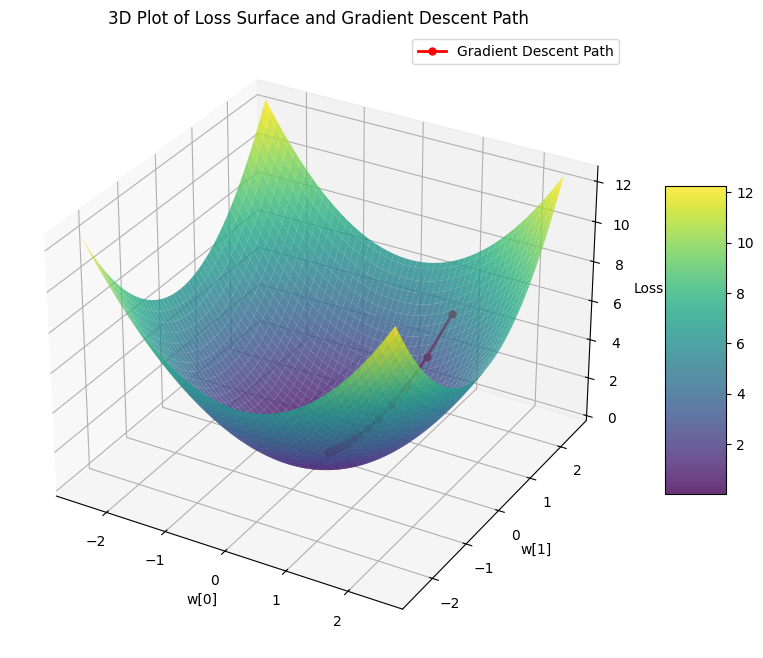

In [44]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Initialize tensor w with requires_grad=True
w = torch.tensor([1.0, 2.0], requires_grad=True)
learning_rate = 0.1
num_iterations = 20

# Lists to store w values and losses for plotting
w_values = []
losses = []

# Perform gradient descent and collect data
for iteration in range(num_iterations):
    # Forward pass: Compute loss = w^2 (element-wise, summed)
    loss = (w**2).sum()  # loss = w1^2 + w2^2
    
    # Store w and loss values
    w_values.append(w.detach().clone().numpy())
    losses.append(loss.item())
    
    # Backward pass: Compute gradients
    loss.backward()
    
    # Gradient descent update
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # Zero gradients
    w.grad.zero_()

# Convert w_values to numpy array
w_values = np.array(w_values)  # Shape: (num_iterations, 2)

# Create data for the 3D surface plot
w1_range = np.linspace(-2.5, 2.5, 100)
w2_range = np.linspace(-2.5, 2.5, 100)
W1, W2 = np.meshgrid(w1_range, w2_range)
Loss = W1**2 + W2**2  # Loss function: w1^2 + w2^2

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(W1, W2, Loss, cmap='viridis', alpha=0.8)

# Plot the gradient descent trajectory
ax.plot(w_values[:, 0], w_values[:, 1], losses, 'r.-', label='Gradient Descent Path', markersize=10, linewidth=2)

# Add labels and title
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.set_zlabel('Loss')
ax.set_title('3D Plot of Loss Surface and Gradient Descent Path')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Add legend
ax.legend()

# Save the plot
plt.savefig('loss_3d_plot.png')

## Conclusion
In this tutorial, you learned:
- How to create tensors with `requires_grad=True` to track computations.
- How PyTorch builds a computation graph and computes gradients with `.backward()`.
- How to use gradients for optimization (e.g., gradient descent).
- How to disable gradient tracking when needed.

Autograd is the backbone of training neural networks in PyTorch. Try experimenting with more complex functions or neural network models to deepen your understanding!

### Next Steps
- Explore PyTorch's `nn.Module` for building neural networks.
- Try optimizing a linear regression model using Autograd.
- Check the [PyTorch Autograd documentation](https://pytorch.org/docs/stable/autograd.html) for advanced features.